# 读取相关的参数


In [1]:
import os
import glob

In [2]:
prefix = 'clara_seg_ct_brats_fl/eval'

In [17]:
def read_one_item(raw_txt):
    with open(raw_txt) as fp:
        lines = fp.readlines()
        items = lines[2].strip().split()
        mean = float(items[0])
    return mean
            
def read_data(prefix):
    files = glob.glob(prefix + '/**')
    file_ids = [os.path.basename(x) for x in files]
    rounds = dict()
    for f, fid in zip(files, file_ids):
        if 'result' not in f:
            continue
        tc = read_one_item(f + '/mean_dice_TC_summary_results.txt')
        et = read_one_item(f + '/mean_dice_ET_summary_results.txt')
        wt = read_one_item(f + '/mean_dice_WT_summary_results.txt')
        #
        fid = fid.split('_')
        rid = int(fid[-1])
        rounds[rid] = (tc, et, wt)
    return rounds
    

info = read_data(prefix)
print(info)

{55: (0.732, 0.735, 0.789), 130: (0.806, 0.78, 0.877), 145: (0.745, 0.756, 0.835), 1: (0.192, 0.118, 0.133), 5: (0.201, 0.137, 0.263), 105: (0.767, 0.756, 0.848), 199: (0.816, 0.787, 0.87), 115: (0.802, 0.781, 0.831), 155: (0.804, 0.794, 0.828), 45: (0.686, 0.722, 0.787), 175: (0.812, 0.796, 0.858), 60: (0.72, 0.745, 0.793), 65: (0.718, 0.74, 0.805), 10: (0.271, 0.246, 0.302), 90: (0.703, 0.768, 0.819), 75: (0.771, 0.774, 0.839), 35: (0.595, 0.658, 0.725), 160: (0.833, 0.802, 0.884), 85: (0.767, 0.764, 0.848), 30: (0.639, 0.663, 0.731), 15: (0.365, 0.359, 0.43), 20: (0.559, 0.573, 0.613), 165: (0.841, 0.805, 0.888), 170: (0.838, 0.807, 0.886), 185: (0.823, 0.801, 0.888), 100: (0.767, 0.76, 0.822), 140: (0.829, 0.796, 0.869), 195: (0.82, 0.797, 0.845), 190: (0.843, 0.802, 0.884), 50: (0.678, 0.674, 0.698), 70: (0.732, 0.746, 0.803), 25: (0.628, 0.653, 0.677), 40: (0.696, 0.702, 0.757), 125: (0.819, 0.791, 0.883), 110: (0.776, 0.781, 0.84), 180: (0.832, 0.81, 0.882), 135: (0.832, 0.8, 0.

[[0.129, 0.201, 0.271, 0.365, 0.559, 0.628, 0.639, 0.595, 0.696, 0.686, 0.678, 0.732, 0.72, 0.718, 0.732, 0.771, 0.756, 0.767, 0.703, 0.826, 0.767, 0.767, 0.776, 0.802, 0.764, 0.819, 0.806, 0.832, 0.829, 0.745, 0.804, 0.804, 0.833, 0.841, 0.838, 0.812, 0.832, 0.823, 0.843, 0.82], [0.117, 0.137, 0.246, 0.359, 0.573, 0.653, 0.663, 0.658, 0.702, 0.722, 0.674, 0.735, 0.745, 0.74, 0.746, 0.774, 0.761, 0.764, 0.768, 0.782, 0.76, 0.756, 0.781, 0.781, 0.779, 0.791, 0.78, 0.8, 0.796, 0.756, 0.787, 0.794, 0.802, 0.805, 0.807, 0.796, 0.81, 0.801, 0.802, 0.797], [0.069, 0.263, 0.302, 0.43, 0.613, 0.677, 0.731, 0.725, 0.757, 0.787, 0.698, 0.789, 0.793, 0.805, 0.803, 0.839, 0.834, 0.848, 0.819, 0.866, 0.822, 0.848, 0.84, 0.831, 0.843, 0.883, 0.877, 0.866, 0.869, 0.835, 0.87, 0.828, 0.884, 0.888, 0.886, 0.858, 0.882, 0.888, 0.884, 0.845]]


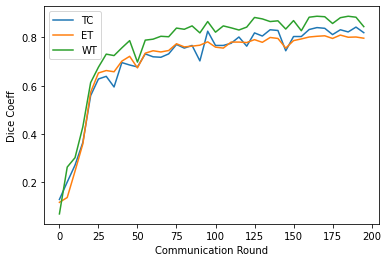

[0.843, 0.81, 0.888]


In [27]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

label_name = ['TC', 'ET', 'WT']
def plot_result(info_mean_dict, start, end, step):
    labels = [[], [], []]
    for i in range(start, end, step):
        j = info_mean_dict[i]
        for k, p in enumerate(j):
            labels[k].append(p)
    #
    print(labels)
    x = np.arange(start, end, step)
    for i, p in enumerate(labels):
        plt.plot(x, p, label=label_name[i])
    plt.legend(loc='best')
    plt.xlabel('Communication Round')
    plt.ylabel('Dice Coeff')
    plt.show()
    #
    maxes = [np.max(p) for p in labels]
    print(maxes)
plot_result(info, 0, 200, 5)
